/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


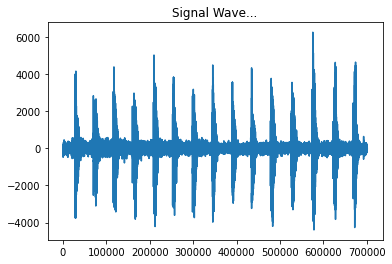

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open("AA.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

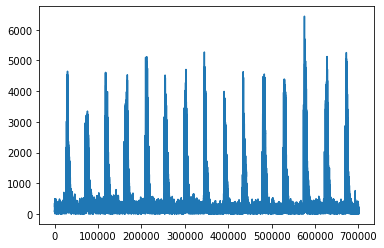

In [ ]:
analytical_signal = hilbert(signal)
# plot(analytical_signal.real)
# plot(analytical_signal.imag)

amplitude_envelope = np.abs(analytical_signal)
duration = 1.0
fs = 701334.0
samples = int(fs*duration)
t = np.arange(samples) / fs
plot(t, amplitude_envelope, label='envelope')
# plot(amplitude_envelope)

44100
(426427,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


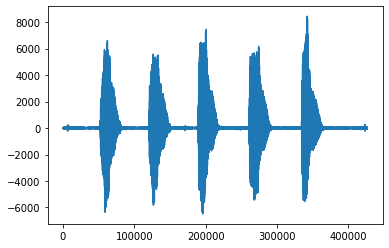

(67, 2)


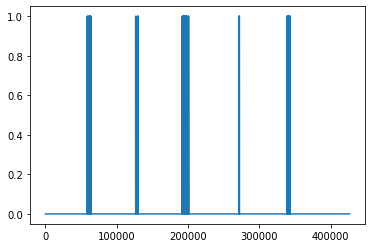

In [ ]:
#### REFERENCE: https://librosa.org/doc/main/generated/librosa.effects.split.html
####            https://github.com/librosa/librosa
import librosa
import numpy as np
import matplotlib.pyplot as plt
import wave

spf = wave.open("AY.wav", "r")
print(spf.getframerate())
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
wave = np.fromstring(signal, "Int16")
wave = wave.astype(np.float)

# look at it
print(wave.shape)
plt.plot(wave)
plt.show()

# get the noisy interval
non_silent_interval = librosa.effects.split(wave, frame_length=10, top_db=2, hop_length=10)
print(non_silent_interval.shape)
# print(non_silent_interval)

# #plot only the noisy chunk of the waveform
# plt.plot(wave[non_silent_interval[0][0]:non_silent_interval[0][1]])
# plt.show()

y = np.zeros((426427,))
for interval in non_silent_interval:
  y[interval[0]:interval[1]] = 1

plt.plot(y)
plt.show()